In [2]:
import os
import pickle
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, learning_curve
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers, regularizers
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

plt.style.use('seaborn')

## Preparing Data
60% training, 20% validation, and 20% testing

In [3]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
    with open(filename,'rb') as f: arr = pickle.load(f)
    return arr


def getDataPath(dirname,filename):
    return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

print(getDataPath("comments","X_comments.pkl"))

X_data = unPickleData(getDataPath("comments","X_comments.pkl"))
y_data = unPickleData(getDataPath("comments","Y_comments.pkl"))

# reducing amount of features
X, y = [], []
Class0_max_count = 37000
for i in range(len(X_data)):
    if y_data[i] == 0: 
        if Class0_max_count > 0:
            # print(i)
            X.append(X_data[i])
            y.append(y_data[i])
            if i%1000 == 0: print(i, end=" ")
            Class0_max_count -= 1 
    else:
        X.append(X_data[i])
        y.append(y_data[i])


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state=15, stratify=y)
X_val,   X_test, y_val,   y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=15, stratify=y_temp)
number_features = len(X_train[0])

0 1000 2000 3000 4000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 

In [4]:
# Remove both lists to save up  memory
X = np.load("X_comment.npy")
y = np.load("y_comment.npy")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state=15, stratify=y)
X_val,   X_test, y_val,   y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=15, stratify=y_temp)
number_features = len(X_train[0])


del X
del y

## Training

In [32]:
model = Sequential()
model.add(keras.layers.Input(shape=number_features))
model.add(keras.layers.Dense(units=1000,activation=tf.nn.relu))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(keras.layers.Dense(units=500, activation=tf.nn.relu))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(units=1, activation=tf.nn.sigmoid))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              7001000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 501       
Total params: 7,502,001
Trainable params: 7,502,001
Non-trainable params: 0
_________________________________________________________________


In [34]:
import time 
starting_time = time.time()
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(X_val, y_val))
end_time = time.time()

Train on 30355 samples, validate on 10119 samples
Epoch 1/100
30355/30355 - 4s - loss: 0.2898 - accuracy: 0.8975 - val_loss: 0.2667 - val_accuracy: 0.9084
Epoch 2/100
30355/30355 - 3s - loss: 0.2021 - accuracy: 0.9244 - val_loss: 0.2739 - val_accuracy: 0.9037
Epoch 3/100
30355/30355 - 3s - loss: 0.1264 - accuracy: 0.9504 - val_loss: 0.3279 - val_accuracy: 0.9046
Epoch 4/100
30355/30355 - 3s - loss: 0.0702 - accuracy: 0.9725 - val_loss: 0.5100 - val_accuracy: 0.9084
Epoch 5/100
30355/30355 - 3s - loss: 0.0484 - accuracy: 0.9801 - val_loss: 0.5422 - val_accuracy: 0.9051
Epoch 6/100
30355/30355 - 3s - loss: 0.0418 - accuracy: 0.9831 - val_loss: 0.6168 - val_accuracy: 0.9057
Epoch 7/100
30355/30355 - 3s - loss: 0.0371 - accuracy: 0.9848 - val_loss: 0.7038 - val_accuracy: 0.9042
Epoch 8/100
30355/30355 - 3s - loss: 0.0343 - accuracy: 0.9856 - val_loss: 0.6693 - val_accuracy: 0.9012
Epoch 9/100
30355/30355 - 3s - loss: 0.0336 - accuracy: 0.9857 - val_loss: 0.8136 - val_accuracy: 0.9052
Epoch

In [ ]:
training_time = end_time - starting_time

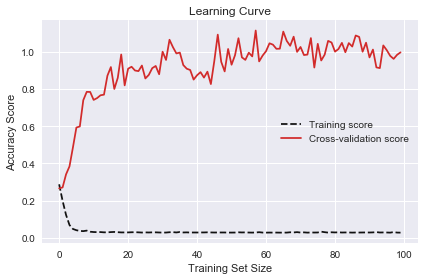

In [6]:
plt.plot(history.history['loss'], '--', color="#111111",  label="Training score")
plt.plot(history.history['val_loss'], color="#D22B2B", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [9]:
model.save("nn-comments")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: nn-comments\assets


In [3]:

model = keras.models.load_model('nn-comments')

In [ ]:
model.summary()

In [5]:
y_pred = model.predict(X_test)
y_test = y_test.reshape(10119, 1)

m = tf.keras.metrics.categorical_accuracy(y_test, y_pred)
print("Which predictions match with one-hot labels:", m.numpy())
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_test, y_pred)
print("Categorical Accuracy:", m.result().numpy())

accuracy =  tf.keras.metrics.binary_accuracy(y_test, y_pred, threshold=0.5)
print("Which predictions match with binary labels:", accuracy.numpy())

accuracy =  tf.keras.metrics.BinaryAccuracy()
accuracy.update_state(y_test, y_pred)
print("Binary Accuracy: ", accuracy.result().numpy())

recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)




prec = tf.keras.metrics.Precision()
prec.update_state(y_test, y_pred)

f1_score = (recall.result().numpy()*prec.result().numpy())/(prec.result().numpy() + recall.result().numpy())
print("F1 score:", f1_score)

Which predictions match with one-hot labels: [1. 1. 1. ... 1. 1. 1.]
Categorical Accuracy: 1.0
Which predictions match with binary labels: [0. 1. 1. ... 1. 1. 1.]
Binary Accuracy:  0.90384424
F1 score: 0.39845547


In [13]:
y_pred = model.predict(X_test)
y_test = y_test
y_pred = [1 if (d > 0.5) else 0 for d in y_pred]
print(sklearn.metrics.classification_report(np.concatenate((y_test)),y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(np.concatenate((y_test)), y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7501
           1       0.88      0.73      0.80      2618

    accuracy                           0.90     10119
   macro avg       0.89      0.85      0.87     10119
weighted avg       0.90      0.90      0.90     10119

Accuracy:  0.9038442533847219


In [11]:
pred = np.array(y_pred)

In [12]:
pred.shape

(10119,)